In [278]:
import os

from PIL import Image
import numpy as np

In [551]:
IMG_NO = str(10)
img_1_name = IMG_NO + '-1.png'
img_2_name = IMG_NO + '-2.png'
img_3_name = IMG_NO + '-3.png'

RES = 50

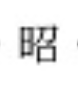

In [552]:
# 計算対象画像を読み込み
img = Image.open(img_1_name)
img

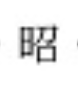

In [553]:
# グレースケール変換
gray_img = img.convert('L')
gray_img

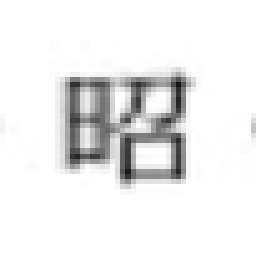

In [554]:
# (RES + 1) x RESサイズへリサイズ
small_gray_img = gray_img.resize([RES + 1, RES], Image.ANTIALIAS)
small_gray_img.resize([256, 256]).save(IMG_NO + '_gray_small.bmp')
small_gray_img.resize([256, 256])

In [555]:
# 右隣のピクセルと値を比較して、dHashを算出
dhash_array = [[] for _ in range(RES)]
for y in range(0, RES):
    for x in range(0, RES):
        dhash_val = 1 if small_gray_img.getpixel((x, y)) < small_gray_img.getpixel((x + 1, y)) else 0
        dhash_array[y].append(dhash_val)
dhash_array

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

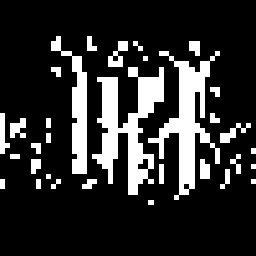

In [556]:
# 0を黒、1を白にして表示
Image.fromarray((np.matrix(dhash_array) * 255).astype('uint8'), 'L').resize((256, 256))

In [557]:
dhash = np.asarray(dhash_array).flatten()
''.join(str(val) for val in dhash)

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000010000000000000000000000000000000000000000001100000100000110100000000001100000000000000000000011000001100001100100000000011000000000000000000000001100000000100000000110000010001000000000000000000000110000010100001000010000000100000000000000000000001100000111000000000011100110000000000000000000110011000000000110000100011101100000000000000000000100011000000001100001000111111000000000000000000000000110011110000111110001111100000000000000000000000001100011100001111100011111000000000000000000000000111000111000011111000111110110000000000000000000001110001110000111110001110100100000000000000000000011100011100001111100011101000000000

In [558]:
def to_hex(hash_array):
    hex_str = ''
    for array in hash_array:
        hash_val = int("".join(str(val) for val in array), 2)
        hex_str += hex(hash_val)[2:].rjust(2, '0')
    return hex_str

In [559]:
to_hex(dhash_array)

'000000000000004100000000c106801800c1864018003008060880c14210100c1c00e600cc018476004601847e006787c7c006387c7c00e387c7d80e387c7480e387c7400e38707400e387074002000e39e07500221067981f1802e10e3b83f80a2c00e1fc7fc142a10e398676702010e399c766030c0e39c471002040e39c47081c006f9f47088c0e71d07490c0e3194760980e11e4762810011e476202044191d4702120483018050401806000800010000000000000000000000000'

In [560]:
# 今までの計算を1つの関数にまとめる
def dhash(path):
    input_dir_name = os.path.dirname(path)
    input_base_name = os.path.basename(path)
    input_name, input_ext = os.path.splitext(input_base_name)
    
    
    img = Image.open(path)
    gray_img = img.convert('L')
    small_gray_img = gray_img.resize([RES + 1, RES], Image.ANTIALIAS)
    small_gray_img.resize((64, 64)).save(input_name + '_small_gray.' + input_ext)

    dhash_array = [[] for _ in range(RES)]
    for y in range(0, RES):
        for x in range(0, RES):
            dhash_val = 1 if small_gray_img.getpixel((x, y)) < small_gray_img.getpixel((x + 1, y)) else 0
            dhash_array[y].append(dhash_val)
    
    bi_img = Image.fromarray((np.matrix(dhash_array) * 255).astype('uint8'), 'L').resize((64, 64))
    bi_img.save(input_name + '_binary.' + input_ext)
    
    return dhash_array

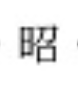

In [561]:
Image.open(img_1_name)

In [562]:
dhash1 = dhash(img_1_name)
to_hex(dhash1)

'000000000000004100000000c106801800c1864018003008060880c14210100c1c00e600cc018476004601847e006787c7c006387c7c00e387c7d80e387c7480e387c7400e38707400e387074002000e39e07500221067981f1802e10e3b83f80a2c00e1fc7fc142a10e398676702010e399c766030c0e39c471002040e39c47081c006f9f47088c0e71d07490c0e3194760980e11e4762810011e476202044191d4702120483018050401806000800010000000000000000000000000'

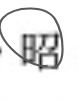

In [563]:
Image.open(img_2_name)

In [564]:
dhash2 = dhash(img_2_name)
to_hex(dhash2)

'002200000060007000004007f040000200f83f1000041ff001c800010f00000720002386400419000e3000008e8001980000027c0036011400134003c030c2209a0028028a2001a402800404014d40280070f284d003403000c12680340033c033680140833c3e36801a0031c3e3340d0030e3e3340268030e3e3b40134030e383b4019b030c383b4034c831cf03b40327033cc0fb40371830fc1f346368c30ce3fb14306330cee3b183811b0cee3340202871ce03340252033cec36c4203031ce02d042030300ec3d042008360dc3b342804008e0b9108320c0e0181040e030004000400000000000000000000001008000200201808000200101'

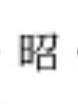

In [565]:
Image.open(img_3_name)

In [566]:
dhash3 = dhash(img_3_name)
to_hex(dhash3)

'000000000000000000004100000000c1864018001244060900c18018900e18106600c0018476006787c7e006787c7c00e387c7d80e38787480e38747400e387074002000e38607400221067981f1802e10e3b83f8882c10e1fc7f4182230e399c76703050e399c742020c0e39847081c00679f47088c0e71c07490c0e1194760910e11e476302010151e4766020c4181807041180600040001000000000000000000000002020000400404c30000400202e30010040040'

In [567]:
def calc_hamming_distance(dhash1, dhash2):
    distance = 0
    for y in range(len(dhash1)):
        for x in range(len(dhash2)):
            if dhash1[y][x] != dhash2[y][x]:
                distance += 1
    return distance

In [568]:
calc_hamming_distance(dhash1, dhash2)

615

In [569]:
calc_hamming_distance(dhash1, dhash3)

251